# 1.Import Data & Python Packages

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
# Read CSV train data file into DataFrame
train_df = pd.read_csv("train.csv")

#Read CSV test data file into DataFrame
test_df = pd.read_csv("test.csv")

In [130]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [131]:
print("Total number of samples in train dataset {}".format(train_df.shape[0]))

Total number of samples in train dataset 891


In [132]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [133]:
print("Total number of samples in test dataset {}".format(test_df.shape[0]))

Total number of samples in test dataset 418


Note: The goal is to predict the survival column in the test dataset.

# 2. Data Quality & Missing Value Assessment

In [134]:
#Count of Missing values in training dataframe
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [135]:
#Count of Missing values in testing dataframe
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

The Age, Cabin, Embarked and Fare columns have missing values in our training and testing dataframe and we will be individually assessing them.

## 2.1 Age - Missing Values

In [136]:
#percent of missing "Age"
agePercent = ((train_df['Age'].isnull().sum()/train_df.shape[0]))*100
print("Percent of Missing Age records: {}%".format(agePercent))

Percent of Missing Age records: 19.865319865319865%


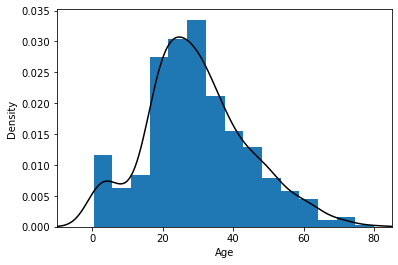

In [137]:
x = train_df['Age'].hist(bins=15, density=True)
train_df['Age'].plot(kind='density', color='black')
x.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

Since our data is skewed to the right , using mean to fill the null records might gives us biased results. Thus we will use median to fill our data.

In [138]:
# median age
print('The median of Age is %.2f' %(train_df["Age"].median()))

The median of Age is 28.00


## 2.2 Cabin - Missing Values

In [139]:
#percent of missing "Cabin"
cabinPercent = ((train_df['Cabin'].isnull().sum()/train_df.shape[0])*100)
print("Percent of Missing Cabin records: {}%".format(cabinPercent))

Percent of Missing Cabin records: 77.10437710437711%


77% of the records are missing , it is unwise to use this variable for prediction and we cannot justify imputing imformation in the missing records. We will ignore this variable in our model.

## 2.3 Embarked - Missing Values

In [140]:
#percent of missing "Embarked"
embarkedPercent = (train_df['Embarked'].isnull().sum()/train_df.shape[0])*100
print("Percent of Missing Embarked records: {}%".format(embarkedPercent))

Percent of Missing Embarked records: 0.22446689113355783%


Since there are only 2 missing values for the embarked column we can just replace them with the most common value.

In [141]:
print('Boarded passengers grouped:')
print(train_df['Embarked'].value_counts())

Boarded passengers grouped:
S    644
C    168
Q     77
Name: Embarked, dtype: int64


The most common embarkment is from S.

## 2.4 Fare - Missing Values

There is 1 missing value in our Fare column in the testing DataFrame. We can replace it with the median.

In [142]:
#median Fare
print('The median of Fare is %.2f' %(test_df["Fare"].median()))

The median of Fare is 14.45


## 2.4 Final Adjustments to our Data (Train and Test)

The following changes will be made to our existing datasets:

1. All the missing values in the 'Age' column will be replaced by the Median (28.0) age.
2. ALl the missing values in the 'Embarked' column will be replaced by the most common (s) embarkment.
3. 'Cabin' as a variable will be ignored due to too many values missing.

In [143]:
#Adjustment to training data
train_data = train_df.copy()
train_data['Age'].fillna(value=28, inplace=True)
train_data['Embarked'].fillna(value='S', inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)

In [144]:
#check for missing values in training data
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [145]:
#Adjustment to testing data
test_data = test_df.copy()
test_data['Age'].fillna(value=28,inplace=True)
test_data['Fare'].fillna(value=14.45,inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

In [146]:
#check for missing values in testing data
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Aditional changes to simplify our data

SibSp and Parch relate to whether the individual was travelling alone or with family members. These two can be combined to form a single predictor.

In [147]:
#Create a new variable to indicate if the individual was travelling alone and drop the existing columns as the
#column combines the effect of both.
train_data['TravelAlone'] = np.where((train_data['SibSp']+train_data['Parch'])>0, 0, 1)
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

test_data['TravelAlone'] = np.where((test_data['SibSp']+test_data['Parch'])>0, 0, 1)
test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)


Categorical variables for 'Pclass', 'Embarked' and 'Sex' are created to make our data more qualitative.

In [148]:
#Create categorical variables and drop variables which have no need in the prediction of data
training=pd.get_dummies(train_data, columns=['Pclass','Embarked','Sex'])
training.drop('Sex_female',axis=1,inplace=True)
training.drop('PassengerId',axis=1,inplace=True)
training.drop('Name',axis=1,inplace=True)
training.drop('Ticket',axis=1,inplace=True)

final_train = training

testing = pd.get_dummies(test_data, columns=["Pclass","Embarked","Sex"])
testing.drop('Sex_female', axis=1, inplace=True)
testing.drop('PassengerId', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)

final_test = testing


# 3. Data Analysis

## 3.1 Age

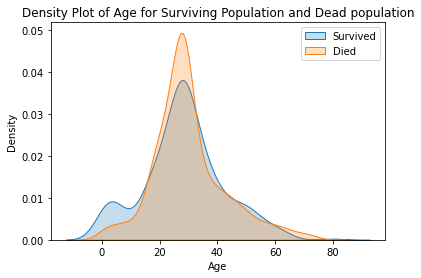

In [165]:
sns.kdeplot(final_train['Age'][final_train.Survived == 1],shade=True)
sns.kdeplot(final_train['Age'][final_train.Survived == 0],shade=True)
plt.legend(['Survived','Died'])
plt.title('Density Plot of Age for Surviving Population and Dead population')
plt.show()

The age distribution of survivors and dead are very similar with the difference in the number of children saved compared to the number of children that died.
Thus we can introduce another categorical 

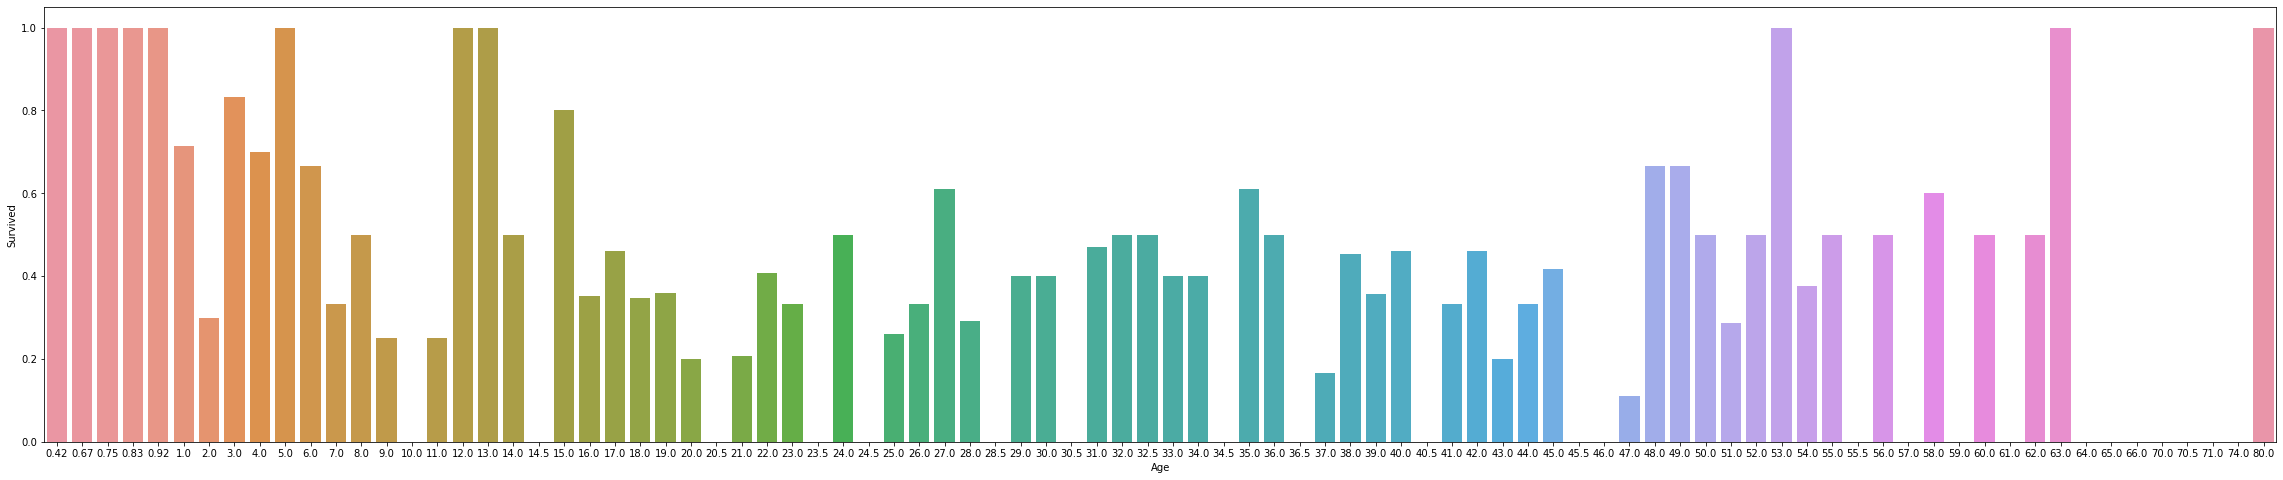

In [171]:


plt.figure(figsize=(40,8))
survival_byage = final_train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
g = sns.barplot(x='Age', y='Survived', data=survival_byage)
plt.show()

